In [2]:
import pandas as pd
import numpy as np
import pickle
import gc
import os
import time
import copy
import multiprocessing as mp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from scipy import sparse, spatial
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas()

/root/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [3]:
tic = time.time()
DATA_PATH = '../pkl/'
SAVE_PATH = './feats/'
if not os.path.exists(SAVE_PATH):
    print('create dir: %s' % SAVE_PATH)
    os.mkdir(SAVE_PATH)

print('gen_user_hour_expo...')

gen_user_hour_expo...


In [4]:
invite_info = pd.read_pickle(os.path.join(DATA_PATH, 'invite_info.pkl'))
invite_info_evaluate = pd.read_pickle(os.path.join(DATA_PATH, 'invite_info_evaluate.pkl'))
data = pd.read_pickle(os.path.join(DATA_PATH, 'invite_data.pkl'))

In [5]:
oversample = True

In [6]:
if oversample:
    data_s = pd.concat([invite_info, invite_info_evaluate, invite_info_evaluate])
else:
    data_s = pd.concat([invite_info, invite_info_evaluate])

In [7]:
print(len(data), len(data_s))

10630845 11772528


In [8]:
tmp = data_s.groupby(['uid', 'ihour'])['qid'].count().reset_index()
tmp = tmp.pivot(index='uid', columns='ihour', values='qid').reset_index()
tmp.columns=['uid'] + ['ihour_{}_expo'.format(i) for i in range(1,25)]
data = data.merge(tmp, 'left', 'uid')

In [15]:
data[['ihour_{}_expo'.format(i) for i in range(1,25)]].to_pickle(os.path.join(SAVE_PATH, 'user_hour_expo.pkl'))

In [10]:
toc = time.time()
print('Used time: %d' % int(toc-tic))

Used time: 23


In [11]:
data.head()

,iday,ihour,itime,label,qid,uid,ihour_1_expo,ihour_2_expo,ihour_3_expo,ihour_4_expo,...,ihour_15_expo,ihour_16_expo,ihour_17_expo,ihour_18_expo,ihour_19_expo,ihour_20_expo,ihour_21_expo,ihour_22_expo,ihour_23_expo,ihour_24_expo
0,3865,22,92782,0.0,2166419046,401693808,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
1,3844,11,92267,0.0,1550017551,3392373099,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3862,15,92703,0.0,604029601,2317670257,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
3,3849,11,92387,0.0,2350061229,1618461867,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,3867,4,92812,0.0,2443223942,3544409350,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ihour_1_expo


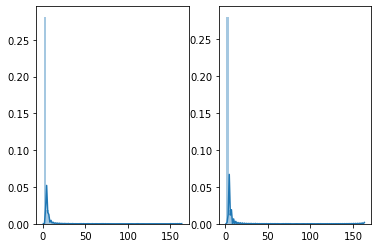

ihour_2_expo


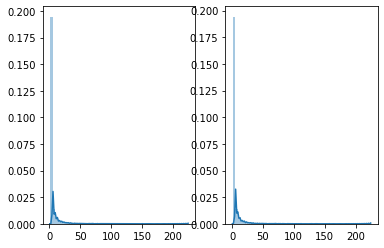

ihour_3_expo


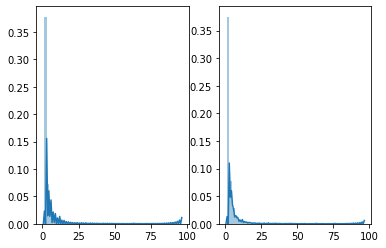

ihour_4_expo


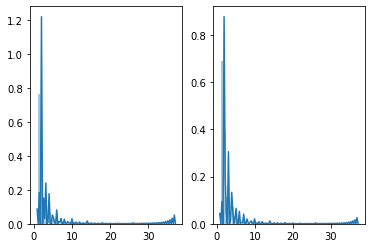

ihour_5_expo


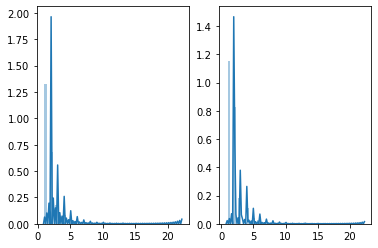

ihour_6_expo


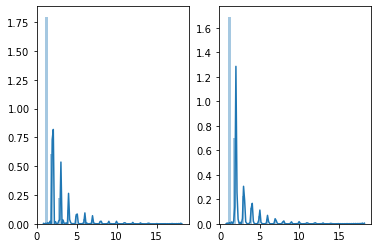

ihour_7_expo


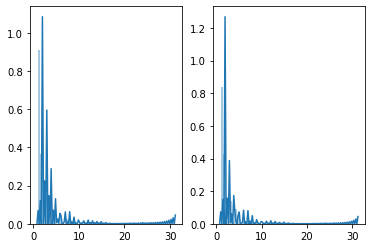

ihour_8_expo


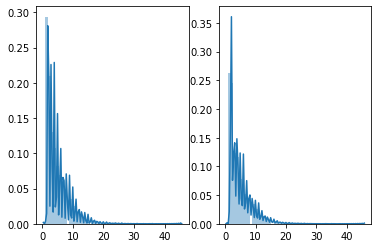

ihour_9_expo


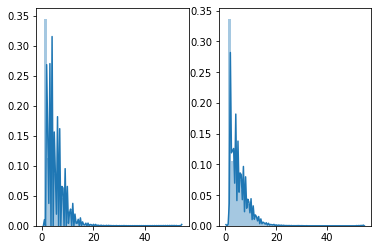

ihour_10_expo


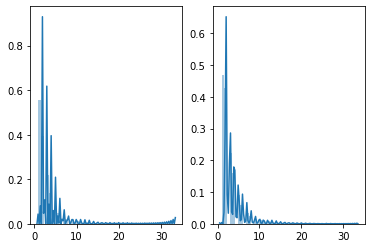

ihour_11_expo


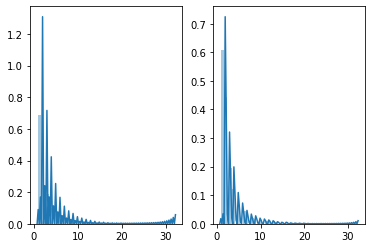

ihour_12_expo


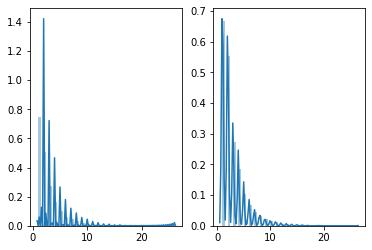

ihour_13_expo


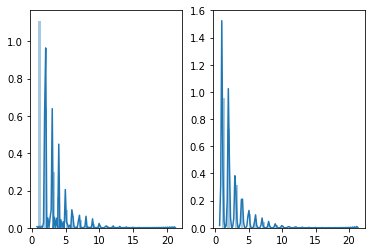

ihour_14_expo


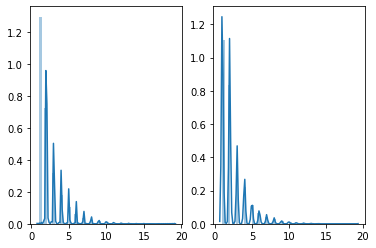

ihour_15_expo


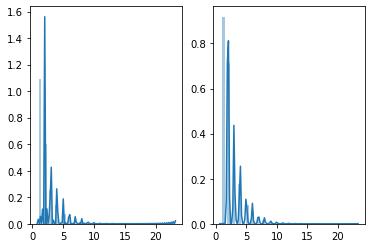

ihour_16_expo


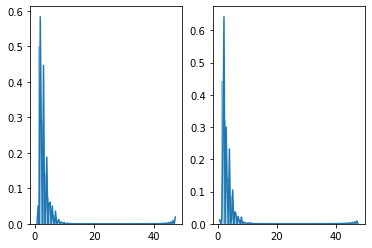

ihour_17_expo


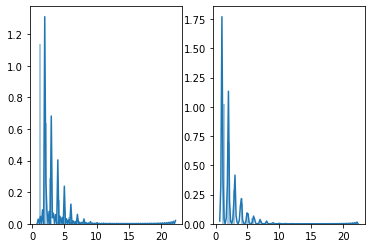

ihour_18_expo


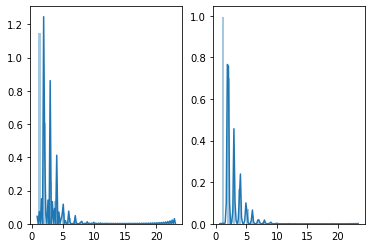

ihour_19_expo


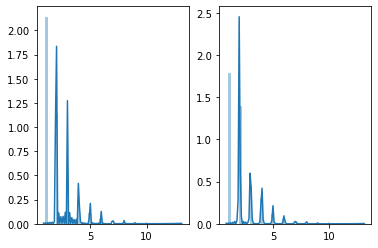

ihour_20_expo


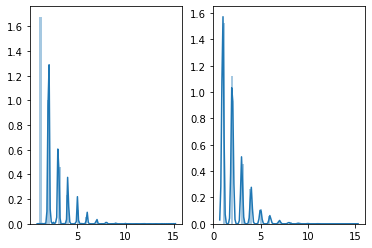

ihour_21_expo


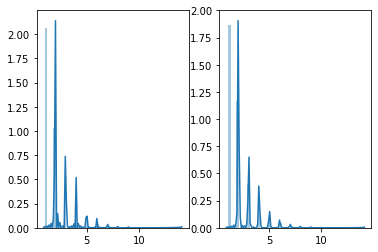

ihour_22_expo


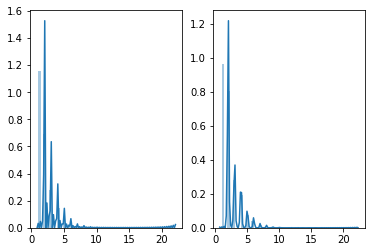

ihour_23_expo


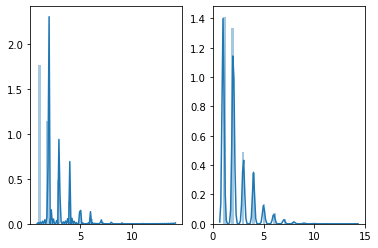

ihour_24_expo


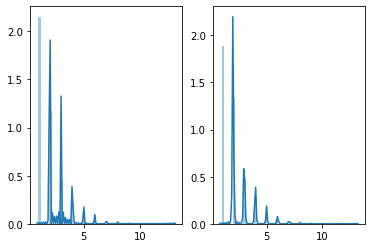

In [13]:
for c in ['ihour_{}_expo'.format(i) for i in range(1,25)]:
    print(c)
    dat = data[c].values
    trn, test = dat[:9489162], dat[9489162:]
    trn = trn[~np.isnan(trn)]
    test = test[~np.isnan(test)]
    plt.subplot(1, 2, 1)
    sns.distplot(trn)
    plt.subplot(1, 2, 2)
    sns.distplot(test)
    plt.show()

ihour_1_expo


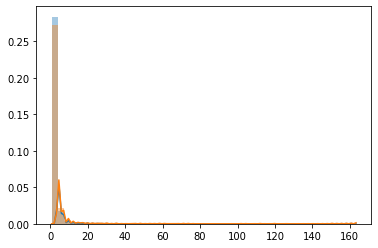

ihour_2_expo


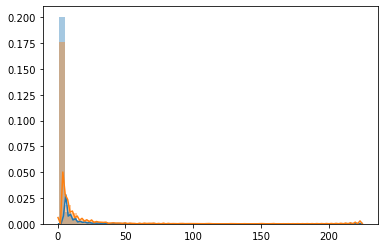

ihour_3_expo


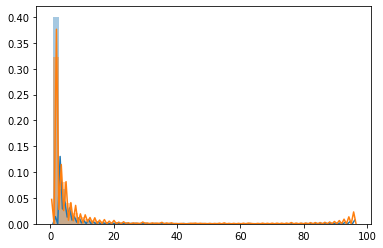

ihour_4_expo


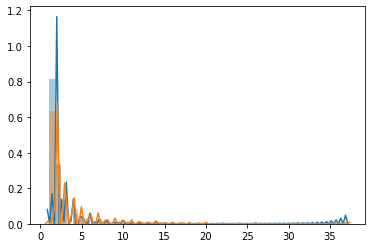

ihour_5_expo


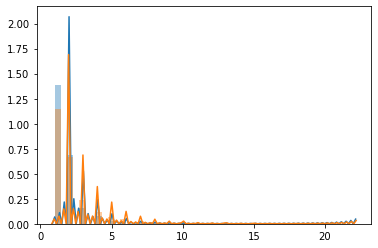

ihour_6_expo


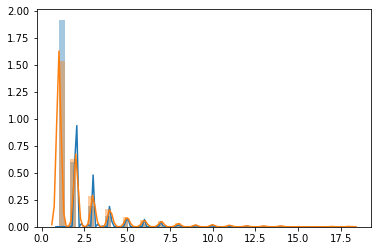

ihour_7_expo


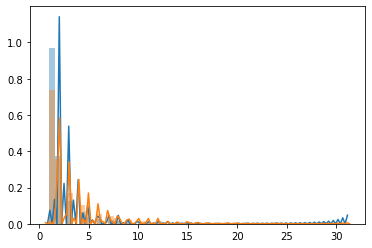

ihour_8_expo


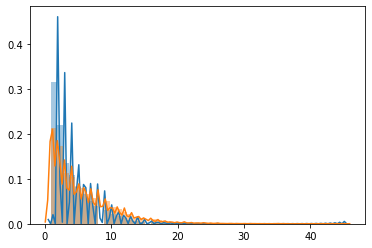

ihour_9_expo


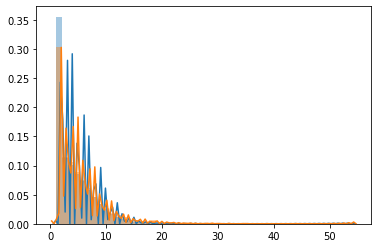

ihour_10_expo


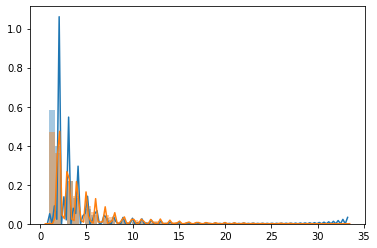

ihour_11_expo


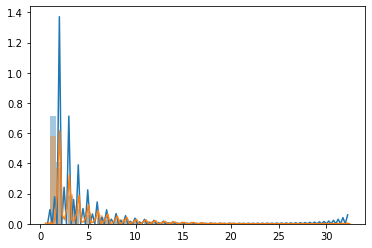

ihour_12_expo


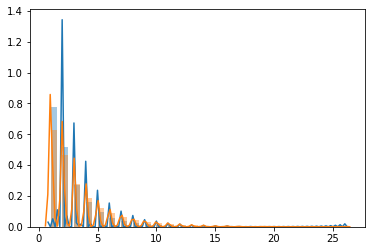

ihour_13_expo


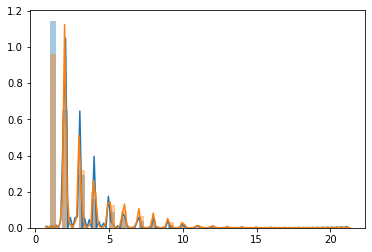

ihour_14_expo


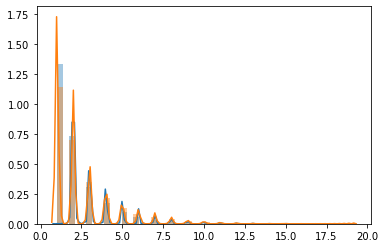

ihour_15_expo


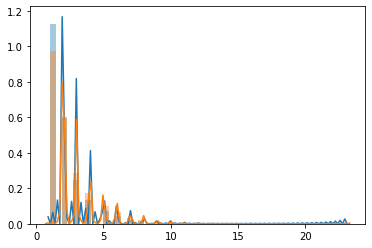

ihour_16_expo


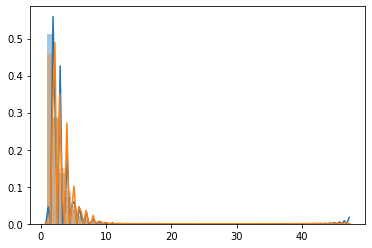

ihour_17_expo


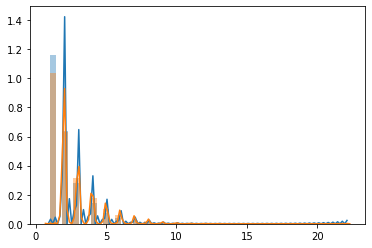

ihour_18_expo


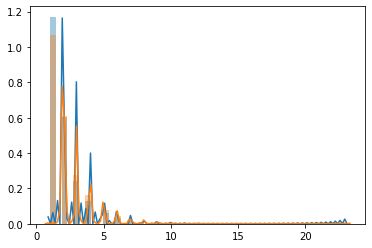

ihour_19_expo


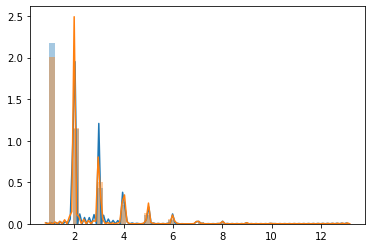

ihour_20_expo


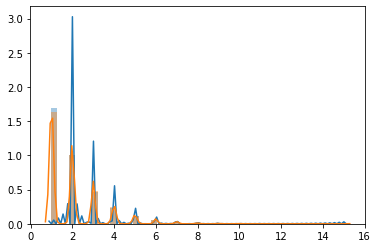

ihour_21_expo


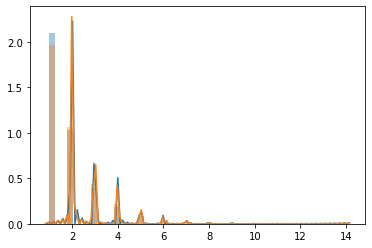

ihour_22_expo


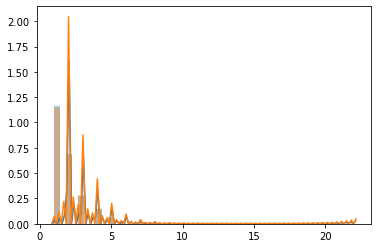

ihour_23_expo


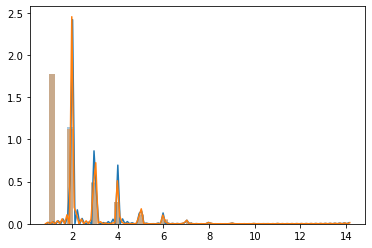

ihour_24_expo


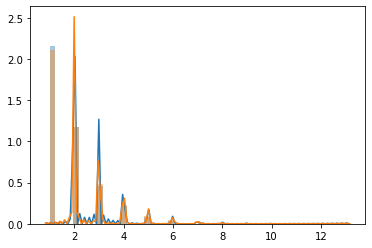

In [14]:
dat0 = data[data['label'] == 0]
dat1 = data[data['label'] == 1]
for c in ['ihour_{}_expo'.format(i) for i in range(1,25)]:
    print(c)
    d0 = dat0[c].values
    d1 = dat1[c].values
    d0 = d0[~np.isnan(d0)]
    d1 = d1[~np.isnan(d1)]
#     plt.subplot(1, 2, 1)
    sns.distplot(d0)
#     plt.subplot(1, 2, 2)
    sns.distplot(d1)
    plt.show()